In [23]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

Mounted at /content/gdrive/


In [2]:
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [3]:
td = raw.iloc[600:,:].reset_index(drop=True) ###調成和底下天數一樣
tdd = td.copy()
tdd = tdd.iloc[:,1:]
td['Date'] = pd.to_datetime(td.Date, format = '%Y/%m/%d')
td

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2020-09-30,429.010010,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,12.269569,96.954582
1,2020-10-01,448.160004,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,13.185803,97.758072
2,2020-10-02,415.089996,126.0,429.128448,93.309685,45.599998,36.500000,209.130005,45.396782,13.434780,97.569595
3,2020-10-05,425.679993,127.0,428.632904,94.492065,45.700001,36.500000,209.130005,45.396782,14.062201,100.555412
4,2020-10-06,413.980011,132.5,435.570343,95.674454,45.900002,36.500000,209.130005,45.396782,13.723594,101.011711
...,...,...,...,...,...,...,...,...,...,...,...
146,2021-04-26,738.200012,104.0,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
147,2021-04-27,704.739990,106.0,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
148,2021-04-28,694.400024,104.5,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
149,2021-04-29,677.000000,106.0,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [9]:
rrr= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/traindays=500/result2021-05-13 09:09:49.csv')
rrr

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0,164.76247,113.493280,303.48190,95.972890,47.743700,38.099590,201.70605,32.461266,18.048777,96.628650
1,1,165.42029,113.155230,303.60175,95.977050,47.743700,37.974148,201.70271,32.198640,18.048777,96.628700
2,2,166.57666,112.605730,303.47208,95.973470,47.743700,37.892340,201.70036,31.099335,18.048777,96.628770
3,3,165.94652,111.599100,303.51285,95.972600,47.743700,38.477356,201.69534,30.842731,18.048777,96.628746
4,4,165.68033,109.867966,302.62988,95.974846,47.743700,37.867620,201.69635,30.899660,18.048777,96.628685
...,...,...,...,...,...,...,...,...,...,...,...
245,245,423.71870,106.409615,597.13983,108.473370,53.399400,31.396801,319.86902,49.212040,24.990920,128.734970
246,246,422.38303,104.864420,596.60693,107.660890,53.733665,31.393015,323.48108,49.444960,24.943350,128.270030
247,247,422.27762,104.322080,598.37800,106.954550,53.916520,31.209724,322.56628,49.801470,24.985424,128.565060
248,248,419.27255,104.409610,599.21246,105.333190,53.788372,31.172300,322.16990,50.049538,25.252113,129.497100


In [10]:
#rdf.iloc[:,1]= td.pop('Date')
rdf = rrr.iloc[99:,:].reset_index(drop=True)
rdf.iloc[:,0]= td['Date']
rdf

,Unnamed: 0,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2020-09-30,384.90550,127.160810,436.93112,96.55707,47.744140,35.432735,202.82797,43.534626,18.048777,96.677605
1,2020-10-01,391.61190,126.082220,439.02335,96.05014,47.743908,35.783436,202.78505,43.787838,18.048777,96.686500
2,2020-10-02,393.13110,124.885450,439.31836,95.96592,47.743706,36.062347,203.58311,44.169970,18.048777,96.785416
3,2020-10-05,398.29810,125.050470,440.87457,95.96311,47.743720,36.070310,205.26318,44.321250,18.048777,97.001420
4,2020-10-06,393.11220,125.706200,441.48123,95.96785,47.743744,36.021103,207.18805,44.443960,18.048777,97.276390
...,...,...,...,...,...,...,...,...,...,...,...
146,2021-04-26,423.71870,106.409615,597.13983,108.47337,53.399400,31.396801,319.86902,49.212040,24.990920,128.734970
147,2021-04-27,422.38303,104.864420,596.60693,107.66089,53.733665,31.393015,323.48108,49.444960,24.943350,128.270030
148,2021-04-28,422.27762,104.322080,598.37800,106.95455,53.916520,31.209724,322.56628,49.801470,24.985424,128.565060
149,2021-04-29,419.27255,104.409610,599.21246,105.33319,53.788372,31.172300,322.16990,50.049538,25.252113,129.497100


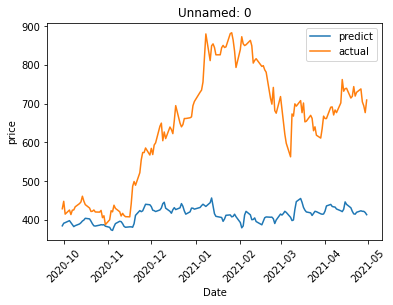

In [11]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
plt.plot(x, y1, label= 'predict')
plt.plot(x, y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

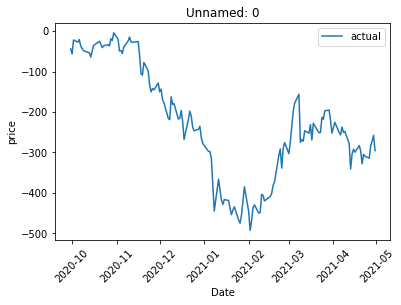

In [12]:
x= pd.to_datetime(td['Date'], format = '%Y/%m/%d')
y1= rdf['TSLA']
y2= td['TSLA']
#plt.plot(x, y1, label='predict')
#plt.plot(x, y2, label= 'actual')
plt.plot(x, y1-y2, label= 'actual')
plt.xlabel('Date')
plt.ylabel('price')
plt.xticks(rotation= 45)
plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [13]:
pre_df=rdf.iloc[:,1:] #刪掉時間行
pre_df

#rdf['Unnamed: 0'] = pd.to_datetime(rdf.Date, format = '%Y/%m/%d')
#rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,384.90550,127.160810,436.93112,96.55707,47.744140,35.432735,202.82797,43.534626,18.048777,96.677605
1,391.61190,126.082220,439.02335,96.05014,47.743908,35.783436,202.78505,43.787838,18.048777,96.686500
2,393.13110,124.885450,439.31836,95.96592,47.743706,36.062347,203.58311,44.169970,18.048777,96.785416
3,398.29810,125.050470,440.87457,95.96311,47.743720,36.070310,205.26318,44.321250,18.048777,97.001420
4,393.11220,125.706200,441.48123,95.96785,47.743744,36.021103,207.18805,44.443960,18.048777,97.276390
...,...,...,...,...,...,...,...,...,...,...
146,423.71870,106.409615,597.13983,108.47337,53.399400,31.396801,319.86902,49.212040,24.990920,128.734970
147,422.38303,104.864420,596.60693,107.66089,53.733665,31.393015,323.48108,49.444960,24.943350,128.270030
148,422.27762,104.322080,598.37800,106.95455,53.916520,31.209724,322.56628,49.801470,24.985424,128.565060
149,419.27255,104.409610,599.21246,105.33319,53.788372,31.172300,322.16990,50.049538,25.252113,129.497100


In [14]:
rdf_log= np.log(pre_df) #取log
rdf_diffk= rdf_log.diff(1).dropna().reset_index(drop=True) #取差分
rdf_diff_e= np.exp(rdf_diffk)-1 #報酬率
rdf_diff_e

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.017423,-0.008482,0.004788,-0.005250,-4.859235e-06,0.009898,-0.000212,0.005816,0.000000,0.000092
1,0.003879,-0.009492,0.000672,-0.000877,-4.230906e-06,0.007794,0.003935,0.008727,0.000000,0.001023
2,0.013143,0.001321,0.003542,-0.000029,2.932324e-07,0.000221,0.008253,0.003425,0.000000,0.002232
3,-0.013020,0.005244,0.001376,0.000049,5.026839e-07,-0.001364,0.009378,0.002769,0.000000,0.002835
4,-0.012914,0.002938,-0.000221,0.000054,3.979579e-07,-0.000664,0.009361,0.002876,0.000000,0.002350
...,...,...,...,...,...,...,...,...,...,...
145,0.009190,-0.012633,-0.006597,-0.006854,9.712313e-03,0.001610,0.008488,-0.001190,-0.001602,-0.001781
146,-0.003152,-0.014521,-0.000892,-0.007490,6.259715e-03,-0.000121,0.011292,0.004733,-0.001903,-0.003612
147,-0.000250,-0.005172,0.002969,-0.006561,3.402988e-03,-0.005839,-0.002828,0.007210,0.001687,0.002300
148,-0.007116,0.000839,0.001395,-0.015159,-2.376785e-03,-0.001199,-0.001229,0.004981,0.010674,0.007250


In [15]:
stock_num=pre_df.shape[1]
inv_days=pre_df.shape[0]-1
print(stock_num,inv_days)

10 150


In [24]:
#將預測報酬率為負的改為0(因為後續要變成權重)
rdf_return_po=rdf_diff_e.copy()
for i in range(stock_num):
  for j in range(inv_days):
    if (rdf_return_po.iloc[j, i] < 0):
      rdf_return_po.iloc[j, i]=0
rdf_return_po

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.017423,0.000000,0.004788,0.000000,0.000000e+00,0.009898,0.000000,0.005816,0.000000,0.000092
1,0.003879,0.000000,0.000672,0.000000,0.000000e+00,0.007794,0.003935,0.008727,0.000000,0.001023
2,0.013143,0.001321,0.003542,0.000000,2.932324e-07,0.000221,0.008253,0.003425,0.000000,0.002232
3,0.000000,0.005244,0.001376,0.000049,5.026839e-07,0.000000,0.009378,0.002769,0.000000,0.002835
4,0.000000,0.002938,0.000000,0.000054,3.979579e-07,0.000000,0.009361,0.002876,0.000000,0.002350
...,...,...,...,...,...,...,...,...,...,...
145,0.009190,0.000000,0.000000,0.000000,9.712313e-03,0.001610,0.008488,0.000000,0.000000,0.000000
146,0.000000,0.000000,0.000000,0.000000,6.259715e-03,0.000000,0.011292,0.004733,0.000000,0.000000
147,0.000000,0.000000,0.002969,0.000000,3.402988e-03,0.000000,0.000000,0.007210,0.001687,0.002300
148,0.000000,0.000839,0.001395,0.000000,0.000000e+00,0.000000,0.000000,0.004981,0.010674,0.007250


In [17]:
rdf_return_po.sum(axis=1)

0      0.038018
1      0.026031
2      0.032137
3      0.021651
4      0.017579
         ...   
145    0.028999
146    0.022285
147    0.017569
148    0.025138
149    0.033274
Length: 150, dtype: float64

In [18]:
rdf_diff=rdf_diff_e.copy()
pro_rdf_diff= pd.DataFrame(columns= rdf_diff.columns, index=rdf_diff.index)
pro_rdf_diff

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for i in range(inv_days):
  for j in range(stock_num):
    np.seterr(invalid='ignore')
    pro_rdf_diff.iloc[i,j]= rdf_return_po.iloc[i,j] / rdf_return_po.sum(axis=1)[i]

pro_rdf_diff.fillna(value=0)
pro_rdf_diff #投資權重

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.458296,0,0.125953,0,0,0.260342,0,0.152989,0,0.00242009
1,0.149027,0,0.025814,0,0,0.299426,0.151184,0.335248,0,0.0393013
2,0.408971,0.0411165,0.110225,0,9.12438e-06,0.00687091,0.256789,0.106573,0,0.0694454
3,0,0.242198,0.0635566,0.00228142,2.3218e-05,0,0.433133,0.127879,0,0.13093
4,0,0.167113,0,0.00308232,2.26379e-05,0,0.532509,0.163583,0,0.133689
...,...,...,...,...,...,...,...,...,...,...
145,0.316894,0,0,0,0.334917,0.0555071,0.292682,0,0,0
146,0,0,0,0,0.280893,0,0.506722,0.212384,0,0
147,0,0,0.16897,0,0.193697,0,0,0.410404,0.0960109,0.130919
148,0,0.0333771,0.0554751,0,0,0,0,0.198151,0.424607,0.28839


In [27]:
# 匯出權重
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/投資權重')
print(os.getcwd())#获取当前工作路径

outstr= 'weight500_151'+ '.csv'
pro_rdf_diff.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/投資權重


'weight500_151.csv'

In [20]:
pro_rdf_diff.sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Length: 150, dtype: float64

In [21]:
tdd_log= np.log(tdd)
tdd_diff= tdd_log.diff(1).dropna().reset_index(drop=True)
tdd_diff_e= np.exp(tdd_diff)-1
tdd_diff_e #真實報酬率

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,0.044638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074675,0.008287
1,-0.073791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018882,-0.001928
2,0.025513,0.007937,-0.001155,0.012672,0.002193,0.000000,0.000000,0.000000,0.046701,0.030602
3,-0.027485,0.043307,0.016185,0.012513,0.004376,0.000000,0.000000,0.000000,-0.024079,0.004538
4,0.027344,-0.011321,0.007964,-0.007209,0.002179,0.000000,0.000000,0.000000,0.053701,0.026711
...,...,...,...,...,...,...,...,...,...,...
145,0.012065,0.000000,0.013289,0.000000,0.011194,-0.006107,-0.060565,0.023574,-0.014801,0.003340
146,-0.045326,0.019231,0.000000,-0.004808,0.003690,0.006792,-0.001146,0.005201,0.013924,-0.000148
147,-0.014672,-0.014151,-0.013115,-0.009662,0.007353,0.049791,0.052869,0.023651,0.001446,0.005697
148,-0.025058,0.014354,-0.003322,0.009756,-0.003650,-0.022338,0.035310,0.016065,-0.045110,0.016627


In [ ]:
pro_rdf_diff.shape

(150, 10)

In [ ]:
tdd_diff_e.shape

(150, 10)

In [ ]:
profit= []
for i in range(inv_days):
    if i == 0:
        temp_profit= 1
    else:
        temp_profit=profit[-1]
    for j in range(stock_num):
        a = pro_rdf_diff.iloc[i,j] #投資權重
        b = tdd_diff_e.iloc[i,j] #真實報酬率
        temp_profit = temp_profit + (a * b)
    if (np.isnan(temp_profit) == True):
        temp_profit = profit[-1]
    profit.append(temp_profit)
print(profit)

[1.0204773280049468, 1.00940475782452, 1.022162861423346, 1.034303189024401, 1.035960184723793, 1.04614104630905, 1.0533327362282763, 1.057040377873438, 1.0747906559578053, 1.0716377448057972, 1.0766741688593409, 1.0497682369383123, 1.0514242025964071, 1.1034249350076466, 1.0967163106149724, 1.1006435918694473, 1.0904289843951225, 1.0850399626945637, 1.0823202292018148, 1.073220235535705, 1.0570774201295507, 1.0781327317394276, 1.1303498646688617, 1.113483333225333, 1.114963142580425, 1.1524170586842495, 1.1356713263973117, 1.1434066495187105, 1.1343054290236936, 1.1360355958331003, 1.1304009513249875, 1.1533647020602187, 1.178351927729239, 1.1756689515550343, 1.1648076200392898, 1.1728160897560929, 1.1578339987536455, 1.1997351994490577, 1.209300507628235, 1.2092114082080478, 1.2125455621266463, 1.2195356103232706, 1.206925598064675, 1.21914919944149, 1.2155104350486703, 1.2213727707171471, 1.2241072411263039, 1.2609386342161655, 1.2671810577145068, 1.2464385439269487, 1.2435898869661

In [ ]:
pdf= pd.DataFrame(profit, columns=['p'])
pdf #利潤

,p
0,1.020477
1,1.009405
2,1.022163
3,1.034303
4,1.035960
...,...
145,1.267438
146,1.268998
147,1.278797
148,1.267916


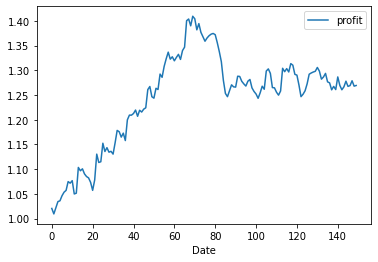

In [ ]:
x= pdf.index
y1= pdf['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [ ]:
return_m = []
return_m.extend(profit)
for i in range(len(return_m)):
    return_m[i] = return_m[i] - 1
# print(return_m) #報酬率

In [ ]:
pdf= pd.DataFrame(return_m, columns=['p'])
pdf #報酬率

,p
0,0.020477
1,0.009405
2,0.022163
3,0.034303
4,0.035960
...,...
145,0.267438
146,0.268998
147,0.278797
148,0.267916


In [ ]:
# pdf.to_csv('td=100_1.csv', index=False)

In [ ]:
# 匯出報酬率
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率')
print(os.getcwd())#获取当前工作路径

outstr= 'td=500_151'+ '.csv'
pdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下
outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果/報酬率


'td=500_151.csv'

In [ ]:
pdf_return = pd.DataFrame(return_m, columns=['p'])
pdf_return
np.var(pdf_return)

p    0.009264
dtype: float64

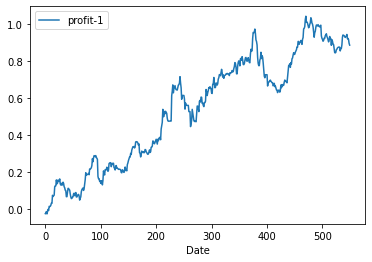

In [ ]:
x= pdf_return.index
y1= pdf['p']
plt.plot(x, y1, label='profit-1')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()

In [ ]:
pdf1= pdf

for i in range(inv_days-1):
  n= i+1
  pdf1.iloc[i,0]=  pdf1.iloc[i-1,0]* pdf.iloc[i,0]

pdf1

,p
0,-2.324569e-02
1,5.174509e-04
2,-7.689401e-06
3,2.121149e-07
4,-3.179496e-09
...,...
545,-4.272013e-211
546,-3.936557e-211
547,-3.602591e-211
548,-3.222719e-211


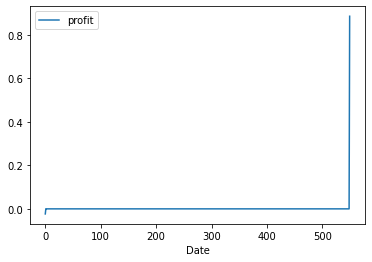

In [ ]:
x= pdf1.index
y1= pdf1['p']
plt.plot(x, y1, label='profit')

plt.xlabel('Date')
#plt.ylabel('price')
#plt.xticks(rotation= 45)
#plt.title(rdf.columns[0])
plt.legend(loc='best')
plt.show()